In [979]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [980]:
data = pd.read_csv('filename.csv') # this file is in files_for_lesson_and_activities folder
data.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fecha
0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [981]:
data["season"].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [982]:
data["season"].replace(1, "Spring", inplace=True)
data["season"].replace(2, "Summer", inplace=True)
data["season"].replace(3, "Autum", inplace=True)
data["season"].replace(4, "Winter", inplace=True)

In [983]:
data["season"].value_counts()

season
Autum     4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64

In [984]:
data["holiday"].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [985]:
data["holiday"].replace(0, "No", inplace=True)
data["holiday"].replace(1, "Yes", inplace=True)

In [986]:
data["holiday"].value_counts()

holiday
No     16879
Yes      500
Name: count, dtype: int64

In [987]:
data["weekday"].value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [988]:
data["weekday"].replace(0, "Sunday", inplace=True)
data["weekday"].replace(1, "Monday", inplace=True)
data["weekday"].replace(2, "Tuesday", inplace=True)
data["weekday"].replace(3, "Wednesday", inplace=True)
data["weekday"].replace(4, "Thursday", inplace=True)
data["weekday"].replace(5, "Friday", inplace=True)
data["weekday"].replace(6, "Saturday", inplace=True)

In [989]:
data["weekday"].value_counts()

weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64

In [990]:
data["weathersit"].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [991]:
data["weathersit"].replace(1, "Very Good", inplace=True)
data["weathersit"].replace(2, "Good", inplace=True)
data["weathersit"].replace(3, "Bad", inplace=True)
data["weathersit"].replace(4, "Very Bad", inplace=True)

In [992]:
data["weathersit"].value_counts()

weathersit
Very Good    11413
Good          4544
Bad           1419
Very Bad         3
Name: count, dtype: int64

In [993]:
data["workingday"].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [994]:
data["workingday"].replace(1, "Yes", inplace=True)
data["workingday"].replace(0, "No", inplace=True)

In [995]:
data["workingday"].value_counts()

workingday
Yes    11865
No      5514
Name: count, dtype: int64

In [996]:
data.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,fecha
0,Spring,No,Saturday,No,Very Good,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,Spring,No,Saturday,No,Very Good,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,Spring,No,Saturday,No,Very Good,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,Spring,No,Saturday,No,Very Good,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,Spring,No,Saturday,No,Very Good,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [997]:
#Testeos de chi-squared entre las variables categoricas
#Variables a testear: season, holiday, weekday, workingday y weathersit

In [998]:
data_crosstab = pd.crosstab(data['weathersit'], data['workingday'], margins = False)
data_crosstab

workingday,No,Yes
weathersit,,
Bad,379,1040
Good,1353,3191
Very Bad,1,2
Very Good,3781,7632


In [999]:
from scipy.stats import chi2_contingency

chi2_contingency(data_crosstab, correction=False)
#Dado este resultado, podemos concluir que existe una relación significativa entre si es un día laborable y las condiciones climáticas. 
#Es decir, las condiciones climáticas varían de manera significativa dependiendo de si es un día laborable o no. 
#Esto podría tener implicaciones importantes en términos de planificación y toma de decisiones, por ejemplo, 
#en la movilidad de las personas, el tráfico

Chi2ContingencyResult(statistic=34.84267124045008, pvalue=1.3151438111663914e-07, dof=3, expected_freq=array([[4.50219575e+02, 9.68780425e+02],
       [1.44171794e+03, 3.10228206e+03],
       [9.51838426e-01, 2.04816157e+00],
       [3.62111065e+03, 7.79188935e+03]]))

In [1000]:
data_crosstab = pd.crosstab(data['weathersit'], data['season'], margins = False)
data_crosstab

season,Autum,Spring,Summer,Winter
weathersit,,,,
Bad,269,369,406,375
Good,947,1205,1144,1248
Very Bad,0,3,0,0
Very Good,3280,2665,2859,2609


In [1001]:
from scipy.stats import chi2_contingency

chi2_contingency(data_crosstab, correction=False)
#Dado este resultado, podemos concluir que existe una relación significativa entre la temporada y las condiciones climáticas. 
#Es decir, las condiciones climáticas varían significativamente según la temporada del año. 
#Esto es coherente con las expectativas comunes, ya que las estaciones del año están asociadas con diferentes patrones climáticos.

Chi2ContingencyResult(statistic=168.67912163587522, pvalue=1.1626263980984891e-31, dof=9, expected_freq=array([[3.67099603e+02, 3.46360435e+02, 3.59996030e+02, 3.45543932e+02],
       [1.17554658e+03, 1.10913447e+03, 1.15279913e+03, 1.10651982e+03],
       [7.76109097e-01, 7.32263076e-01, 7.61090972e-01, 7.30536855e-01],
       [2.95257771e+03, 2.78577283e+03, 2.89544375e+03, 2.77920571e+03]]))

In [1002]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   holiday     17379 non-null  object 
 2   weekday     17379 non-null  object 
 3   workingday  17379 non-null  object 
 4   weathersit  17379 non-null  object 
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  cnt         17379 non-null  int64  
 12  fecha       17379 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 1.7+ MB


In [1003]:
#no nulls

In [1004]:
numericals = data.select_dtypes(np.number)
numericals.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0,3,13,16
1,0.22,0.2727,0.80,0.0,8,32,40
2,0.22,0.2727,0.80,0.0,5,27,32
3,0.24,0.2879,0.75,0.0,3,10,13
4,0.24,0.2879,0.75,0.0,0,1,1


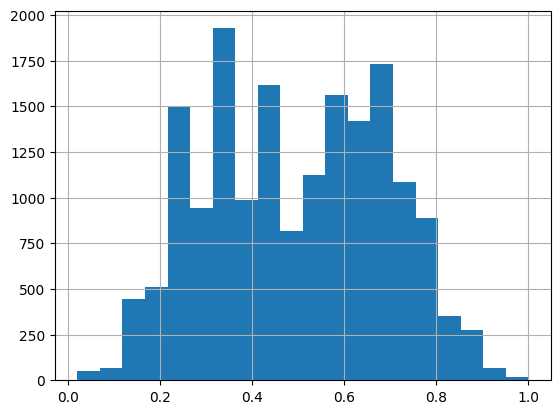

In [1005]:
data['temp'].hist(bins=20)
plt.show()

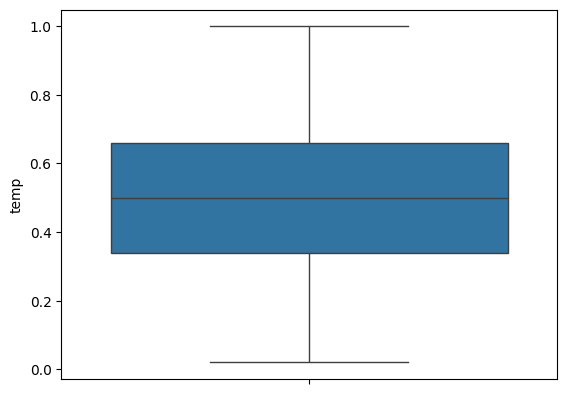

In [1006]:
sns.boxplot(y=data['temp'])
plt.show()

In [1007]:
#no vemos que hayan outliers en la variable de temperatura ya que parece una normal simetrica.

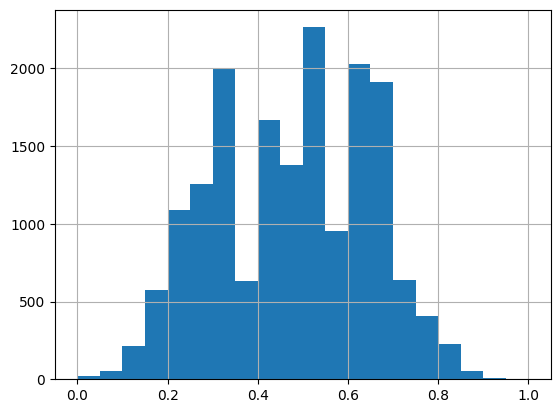

In [1008]:
data['atemp'].hist(bins=20)
plt.show()

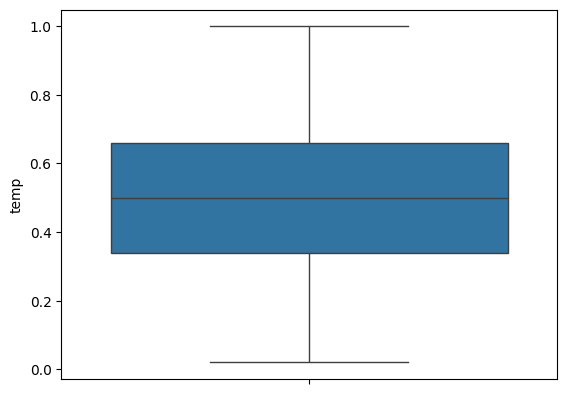

In [1009]:
sns.boxplot(y=data['temp'])
plt.show()

In [1010]:
#no vemos que hayan outliers en la variable de temperatura percibida ya que parece una normal simetrica.

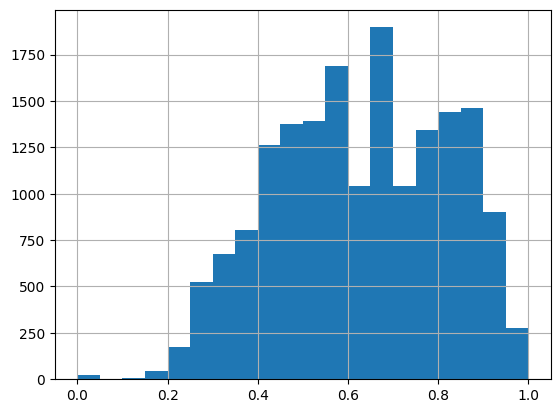

In [1011]:
data['hum'].hist(bins=20)
plt.show()

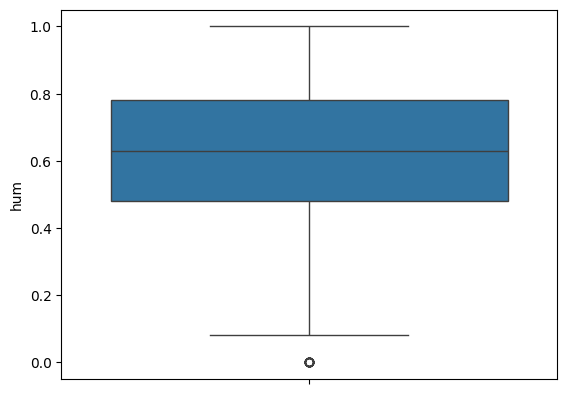

In [1012]:
sns.boxplot(y=data['hum'])
plt.show()

In [1013]:
#en hum si que vemos que tiene outliers de skewness negativa

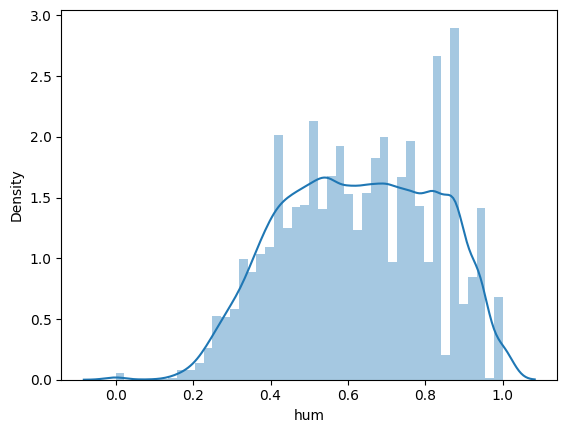

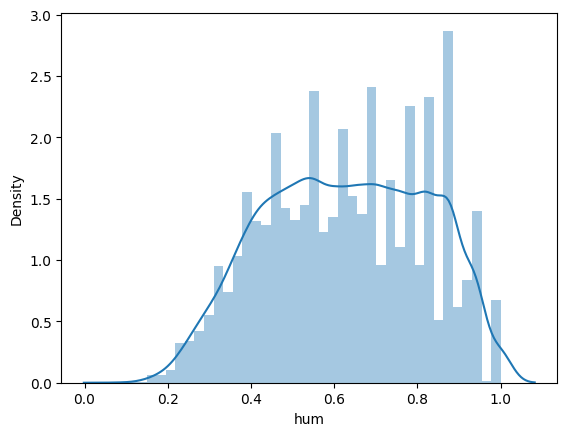

In [1014]:
iqr=np.percentile(data['hum'],75)-np.percentile(data['hum'],25)
#límites estándares son iqr*1,5
lower_limit= np.percentile(data['hum'],25)-1.5*iqr
data2=data[(data['hum']>lower_limit)]
sns.distplot(data['hum'])
plt.show()
sns.distplot(data2['hum'])
plt.show()

In [1015]:
#data sin quitar outliers
#data2 quitando outliers

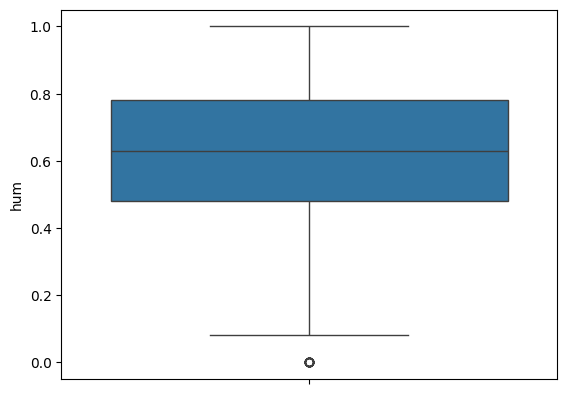

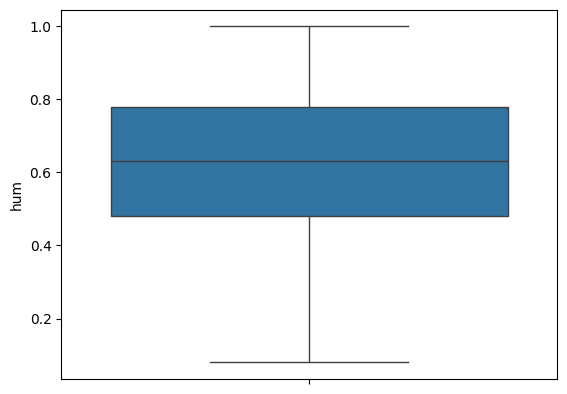

In [1016]:
sns.boxplot(y=data['hum'])
plt.show()
sns.boxplot(y=data2['hum'])
plt.show()

In [1017]:
#normalizamos la variable hum

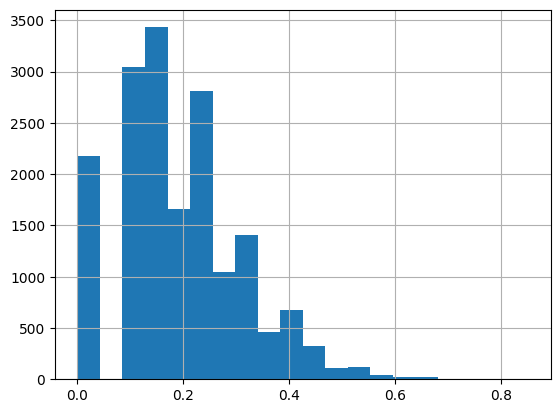

In [1018]:
data['windspeed'].hist(bins=20)
plt.show()

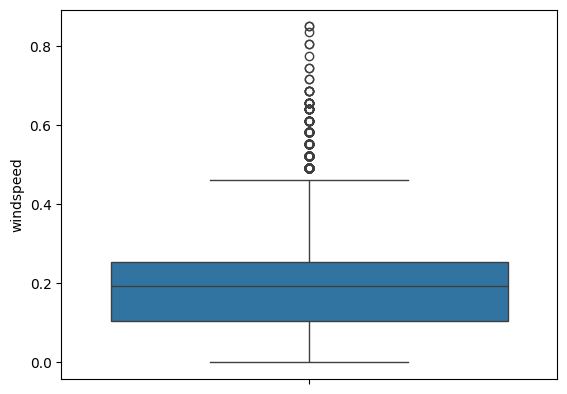

In [1019]:
sns.boxplot(y=data['windspeed'])
plt.show()

In [1020]:
#en este caso la variable windspeed tiene una skewness positiva

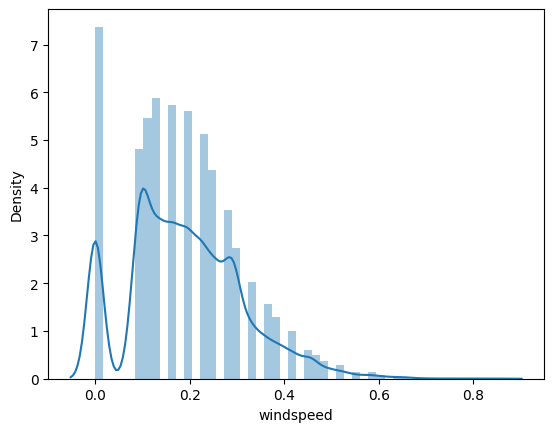

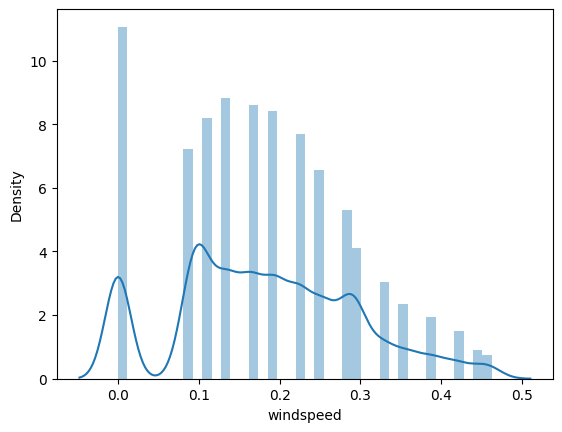

In [1021]:
iqr=np.percentile(data['windspeed'],75)-np.percentile(data['windspeed'],25)
#límites estándares son iqr*1,5
upper_limit= np.percentile(data['windspeed'],75)+1.5*iqr
data2=data[(data['windspeed']<upper_limit)]
sns.distplot(data['windspeed'])
plt.show()
sns.distplot(data2['windspeed'])
plt.show()

In [1022]:
#data sin quitar outliers
#data2 quitando outliers

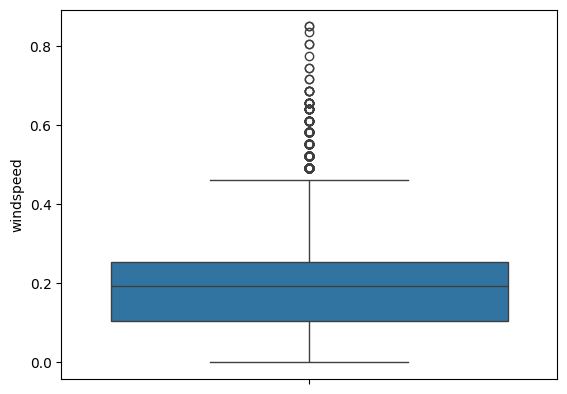

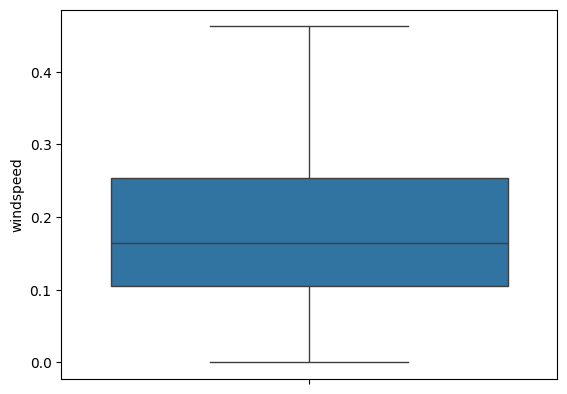

In [1023]:
sns.boxplot(y=data['windspeed'])
plt.show()
sns.boxplot(y=data2['windspeed'])
plt.show()

In [1024]:
#hemos normalizado la variable windspeed y le hemos quitado los outliers

In [1025]:
#en cnt, casual y registered mantenemos los outliers para ver como queda

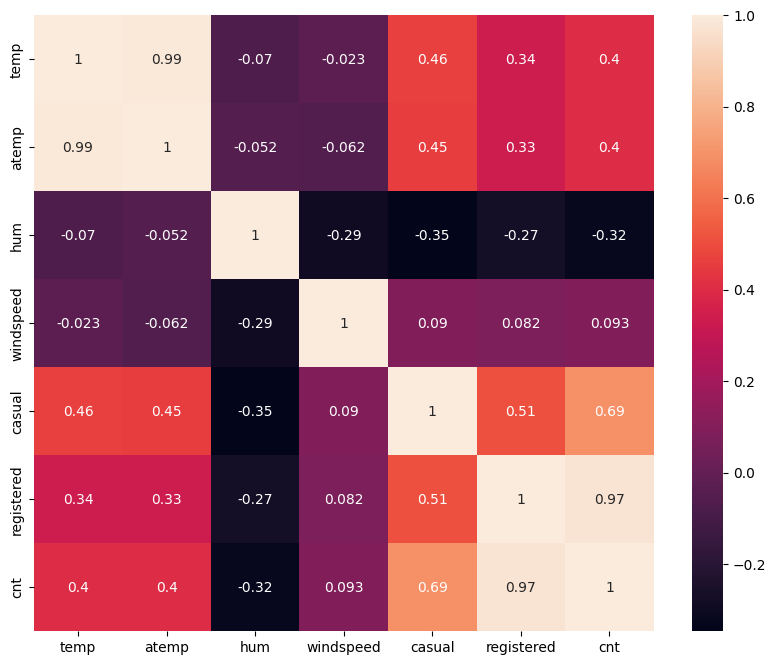

In [1026]:
data_corr = data.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [1027]:
#MENOS DE 0,75 DE R2 LA DEJAMOS
#LAS CORRELACIONES MAS ALTAS DE 0.8 LAS TESTEAMOS

In [1028]:
from sklearn.linear_model import LinearRegression
import seaborn as sns


model = LinearRegression().fit(data_corr[['temp']], data_corr[['atemp']])
model.score(data_corr[['temp']], data_corr[['atemp']])

#temp y atemp tienen una correlacion muy alta deberemos eliminar una

0.9754962542351553

In [1029]:
model = LinearRegression().fit(data_corr[['registered']], data_corr[['cnt']])
model.score(data_corr[['registered']], data_corr[['cnt']])

#registered y cnt tienen una correlacion muy alta deberemos eliminar una

0.9450770435199909

In [1030]:
data_alpha = data.drop(["atemp", "registered"], axis=1)

In [1031]:
data_alpha.sample()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,fecha
4355,Autum,No,Tuesday,Yes,Very Good,0.74,0.58,0.1343,50,227,2011-07-05 09:00:00


In [1032]:
data_alpha = data_alpha.select_dtypes(np.number)

In [1033]:
from sklearn.model_selection import train_test_split

In [1034]:
X = data_alpha.drop(columns = "cnt")
y = data_alpha.cnt

In [1035]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1036]:
X_train.shape

(13034, 4)

In [1037]:
X_test.shape

(4345, 4)

In [1038]:
y_train.shape

(13034,)

In [1039]:
y_test.shape

(4345,)

In [1040]:
#APLICAMOS EL MODELO

In [1041]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [1042]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4369.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        19:55:09   Log-Likelihood:            -1.0899e+05
No. Observations:               17379   AIC:                         2.180e+05
Df Residuals:                   17374   BIC:                         2.180e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3949      5.097     21.658      0.0

In [1043]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.5


In [ ]:
# El modelo es 'decente' ya que R-Squared es mayor que 0.5
# Cualquier p value menor que 0.5 te dice que ese parámetro es estadísticamente significativo, por lo que concluimos que todos lo son
# A nivel coeficientes vemos que la temperatura y la humedad una de forma positiva y otra negativa tienen un coef mas relevante vs la
# constante lo que nos indica que son especialmente indicativas.

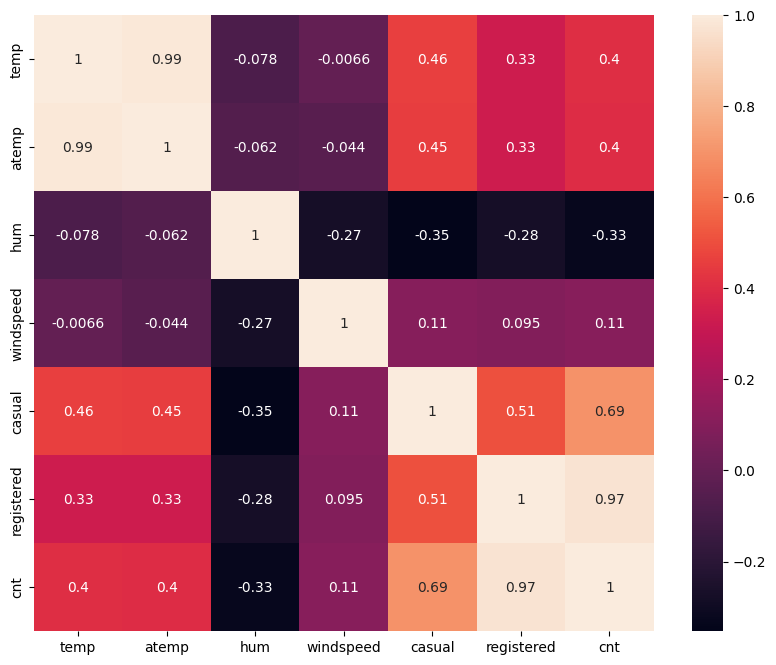

In [1044]:
data_corr = data2.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [1045]:
data_beta = data2.drop(["atemp", "registered"], axis=1)

In [1046]:
data_beta.sample()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,fecha
7032,Winter,No,Tuesday,Yes,Very Good,0.56,0.37,0.1045,63,234,2011-10-25 15:00:00


In [1047]:
data_beta = data_beta.select_dtypes(np.number)

In [1048]:
X = data_beta.drop(columns = "cnt")
y = data_beta.cnt

In [1049]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1050]:
X_train.shape

(12777, 4)

In [1051]:
X_test.shape

(4260, 4)

In [1052]:
y_train.shape

(12777,)

In [1053]:
y_test.shape

(4260,)

In [1054]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4283.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        20:07:55   Log-Likelihood:            -1.0688e+05
No. Observations:               17037   AIC:                         2.138e+05
Df Residuals:                   17032   BIC:                         2.138e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3681      5.190     21.265      0.0

In [1055]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.5


In [ ]:
# El modelo beta sin outliers es exactamente igual que el alpha
# windspeed tiene un pvalor mas bajo en este modelo
# A nivel coeficientes vemos que windspeed tambien aumenta su relevancia aunque ya lo és.

In [1058]:
X_alpha=data_alpha.select_dtypes(include=np.number)

In [1059]:
X_alpha.sample()

,temp,hum,windspeed,casual,cnt
16969,0.32,0.61,0.1343,12,221


In [1060]:
from sklearn.preprocessing import Normalizer #normalizar para que tenga una campana gausiana.
transformer=Normalizer().fit(X_alpha) #marco del que vas a estar.
X_alpha_normalized=transformer.transform(X_alpha) #transformar los datos para pasarlo por el marco definido.
print(X_alpha_normalized)

[[0.01472327 0.04969104 0.         0.18404087 0.98155131]
 [0.00539208 0.01960756 0.         0.19607558 0.9803779 ]
 [0.00679036 0.0246922  0.         0.15432625 0.987688  ]
 ...
 [0.00288011 0.00664641 0.0018189  0.07754142 0.99696116]
 [0.00416847 0.00897823 0.00215317 0.2084233  0.97798625]
 [0.00515331 0.01288327 0.00266188 0.23784499 0.97120036]]


In [1061]:
data_alpha_normalized = pd.DataFrame(X_alpha_normalized)

In [1063]:
data_alpha_normalized

,0,1,2,3,4
0,0.014723,0.049691,0.000000,0.184041,0.981551
1,0.005392,0.019608,0.000000,0.196076,0.980378
2,0.006790,0.024692,0.000000,0.154326,0.987688
3,0.017958,0.056117,0.000000,0.224469,0.972698
4,0.188556,0.589237,0.000000,0.000000,0.785650
...,...,...,...,...,...
17374,0.002176,0.005021,0.001374,0.092043,0.995739
17375,0.002910,0.006714,0.001837,0.089524,0.995956
17376,0.002880,0.006646,0.001819,0.077541,0.996961
17377,0.004168,0.008978,0.002153,0.208423,0.977986


In [1070]:
data_alpha_normalized.rename(columns={4: 'cnt'}, inplace=True)

In [1071]:
data_alpha_normalized

,0,1,2,3,cnt
0,0.014723,0.049691,0.000000,0.184041,0.981551
1,0.005392,0.019608,0.000000,0.196076,0.980378
2,0.006790,0.024692,0.000000,0.154326,0.987688
3,0.017958,0.056117,0.000000,0.224469,0.972698
4,0.188556,0.589237,0.000000,0.000000,0.785650
...,...,...,...,...,...
17374,0.002176,0.005021,0.001374,0.092043,0.995739
17375,0.002910,0.006714,0.001837,0.089524,0.995956
17376,0.002880,0.006646,0.001819,0.077541,0.996961
17377,0.004168,0.008978,0.002153,0.208423,0.977986


In [1072]:
X = data_alpha_normalized.drop(columns = "cnt")
y = data_alpha_normalized.cnt

In [1073]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1074]:
X_train.shape

(13034, 4)

In [1075]:
X_test.shape

(4345, 4)

In [1076]:
y_train.shape

(13034,)

In [1077]:
y_test.shape

(4345,)

In [1078]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 2.745e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        20:25:54   Log-Likelihood:                 50311.
No. Observations:               17379   AIC:                        -1.006e+05
Df Residuals:                   17374   BIC:                        -1.006e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0205      0.000   5623.435      0.0

In [1079]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.86


In [ ]:
#el r2 de este modelo alpha normalizado nos da un r2 muy elevado de 0.8 lo que nos dice que el modelo esta muy bien.
#todos los pvalores de las variables son iguales a 0 lo que nos dice que normalizando windspeed se vuelve más baja incluso que en beta y alpha

In [1080]:
from sklearn.preprocessing import StandardScaler #estandarizar, definirlo en un rango concreto.
optimusprime=StandardScaler().fit(X_alpha)
X_alpha_standardized=optimusprime.transform(X_alpha)
print(X_alpha_standardized)

[[-1.33464759  0.9473725  -1.55388851 -0.66275506 -0.95633924]
 [-1.4385164   0.89553869 -1.55388851 -0.56134262 -0.82402209]
 [-1.4385164   0.89553869 -1.55388851 -0.62219008 -0.8681278 ]
 ...
 [-1.23077877 -0.14113744 -0.21169121 -0.58162511 -0.54836135]
 [-1.23077877 -0.34847267 -0.45609864 -0.45993017 -0.70824458]
 [-1.23077877  0.11803159 -0.45609864 -0.48021266 -0.77440315]]


In [1081]:
data_alpha_standardized = pd.DataFrame(X_alpha_standardized)

In [1082]:
data_alpha_standardized

,0,1,2,3,4
0,-1.334648,0.947372,-1.553889,-0.662755,-0.956339
1,-1.438516,0.895539,-1.553889,-0.561343,-0.824022
2,-1.438516,0.895539,-1.553889,-0.622190,-0.868128
3,-1.334648,0.636370,-1.553889,-0.662755,-0.972879
4,-1.334648,0.636370,-1.553889,-0.723603,-1.039037
...,...,...,...,...,...
17374,-1.230779,-0.141137,-0.211691,-0.500495,-0.388478
17375,-1.230779,-0.141137,-0.211691,-0.561343,-0.553875
17376,-1.230779,-0.141137,-0.211691,-0.581625,-0.548361
17377,-1.230779,-0.348473,-0.456099,-0.459930,-0.708245


In [1083]:
data_alpha_standardized.rename(columns={4: 'cnt'}, inplace=True)

In [1084]:
data_alpha_standardized

,0,1,2,3,cnt
0,-1.334648,0.947372,-1.553889,-0.662755,-0.956339
1,-1.438516,0.895539,-1.553889,-0.561343,-0.824022
2,-1.438516,0.895539,-1.553889,-0.622190,-0.868128
3,-1.334648,0.636370,-1.553889,-0.662755,-0.972879
4,-1.334648,0.636370,-1.553889,-0.723603,-1.039037
...,...,...,...,...,...
17374,-1.230779,-0.141137,-0.211691,-0.500495,-0.388478
17375,-1.230779,-0.141137,-0.211691,-0.561343,-0.553875
17376,-1.230779,-0.141137,-0.211691,-0.581625,-0.548361
17377,-1.230779,-0.348473,-0.456099,-0.459930,-0.708245


In [1085]:
X = data_alpha_standardized.drop(columns = "cnt")
y = data_alpha_standardized.cnt

In [1086]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1087]:
X_train.shape

(13034, 4)

In [1088]:
X_test.shape

(4345, 4)

In [1089]:
y_train.shape

(13034,)

In [1090]:
y_test.shape

(4345,)

In [1091]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4369.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        20:43:50   Log-Likelihood:                -18611.
No. Observations:               17379   AIC:                         3.723e+04
Df Residuals:                   17374   BIC:                         3.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.263e-17      0.005  -1.73e-14      1.0

In [ ]:
# el modelo alpha estandarizado no muestra los mismos resultados de r2 que ni de pvalor que el modelo normalizado.